# Inpainting Signal Visualization and Analysis

This notebook explores the visualization and analysis of inpainting signals using Bayesian techniques. The analysis includes:
1. Visualizing the original signal and observed data.
2. Comparing wavelet-based methods (`db1` and `db8`) for inpainting.
3. Computing uncertainty quantification (UQ) through high-density intervals (HDIs).
4. Generating plots for mean estimates and confidence intervals.

The key objectives are to evaluate the performance of different wavelets in reconstructing the original signal and to quantify the associated uncertainties.

## Importing Required Libraries

The following Python libraries are used in this notebook:
- `numpy`: For numerical computations and data manipulation.
- `matplotlib`: For creating plots and visualizations.
- `arviz`: For Bayesian analysis, including HDI computation.
- `seaborn`: For enhancing the aesthetics of visualizations.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import arviz as az
import seaborn as sns
import sys


sns.set_palette("Paired_r")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
params= {'text.latex.preamble' : r'\usepackage{amsmath}'}
plt.rcParams.update(params)
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25

cm_to_in = 1/2.54

## Visualizing Inpainting Signal and Data

In this section:
- The true signal (`Signal`) is plotted alongside the observed data (`Data`).
- Missing regions in the data are identified and highlighted.

The key datasets include:
- **`Inpainting_signal.npy`**: The original signal.
- **`Inpainting_data.npy`**: The observed data with missing regions.
- **`Inpainting_region1.npy`** and **`Inpainting_region2.npy`**: Define the regions with missing data.

This visualization provides a clear understanding of the inpainting problem and highlights the areas where reconstruction is required.

The figure is saved as `Figure1.pdf`.

C:\Users\ahor\AppData\Local\Temp\ipykernel_1788\2688645454.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


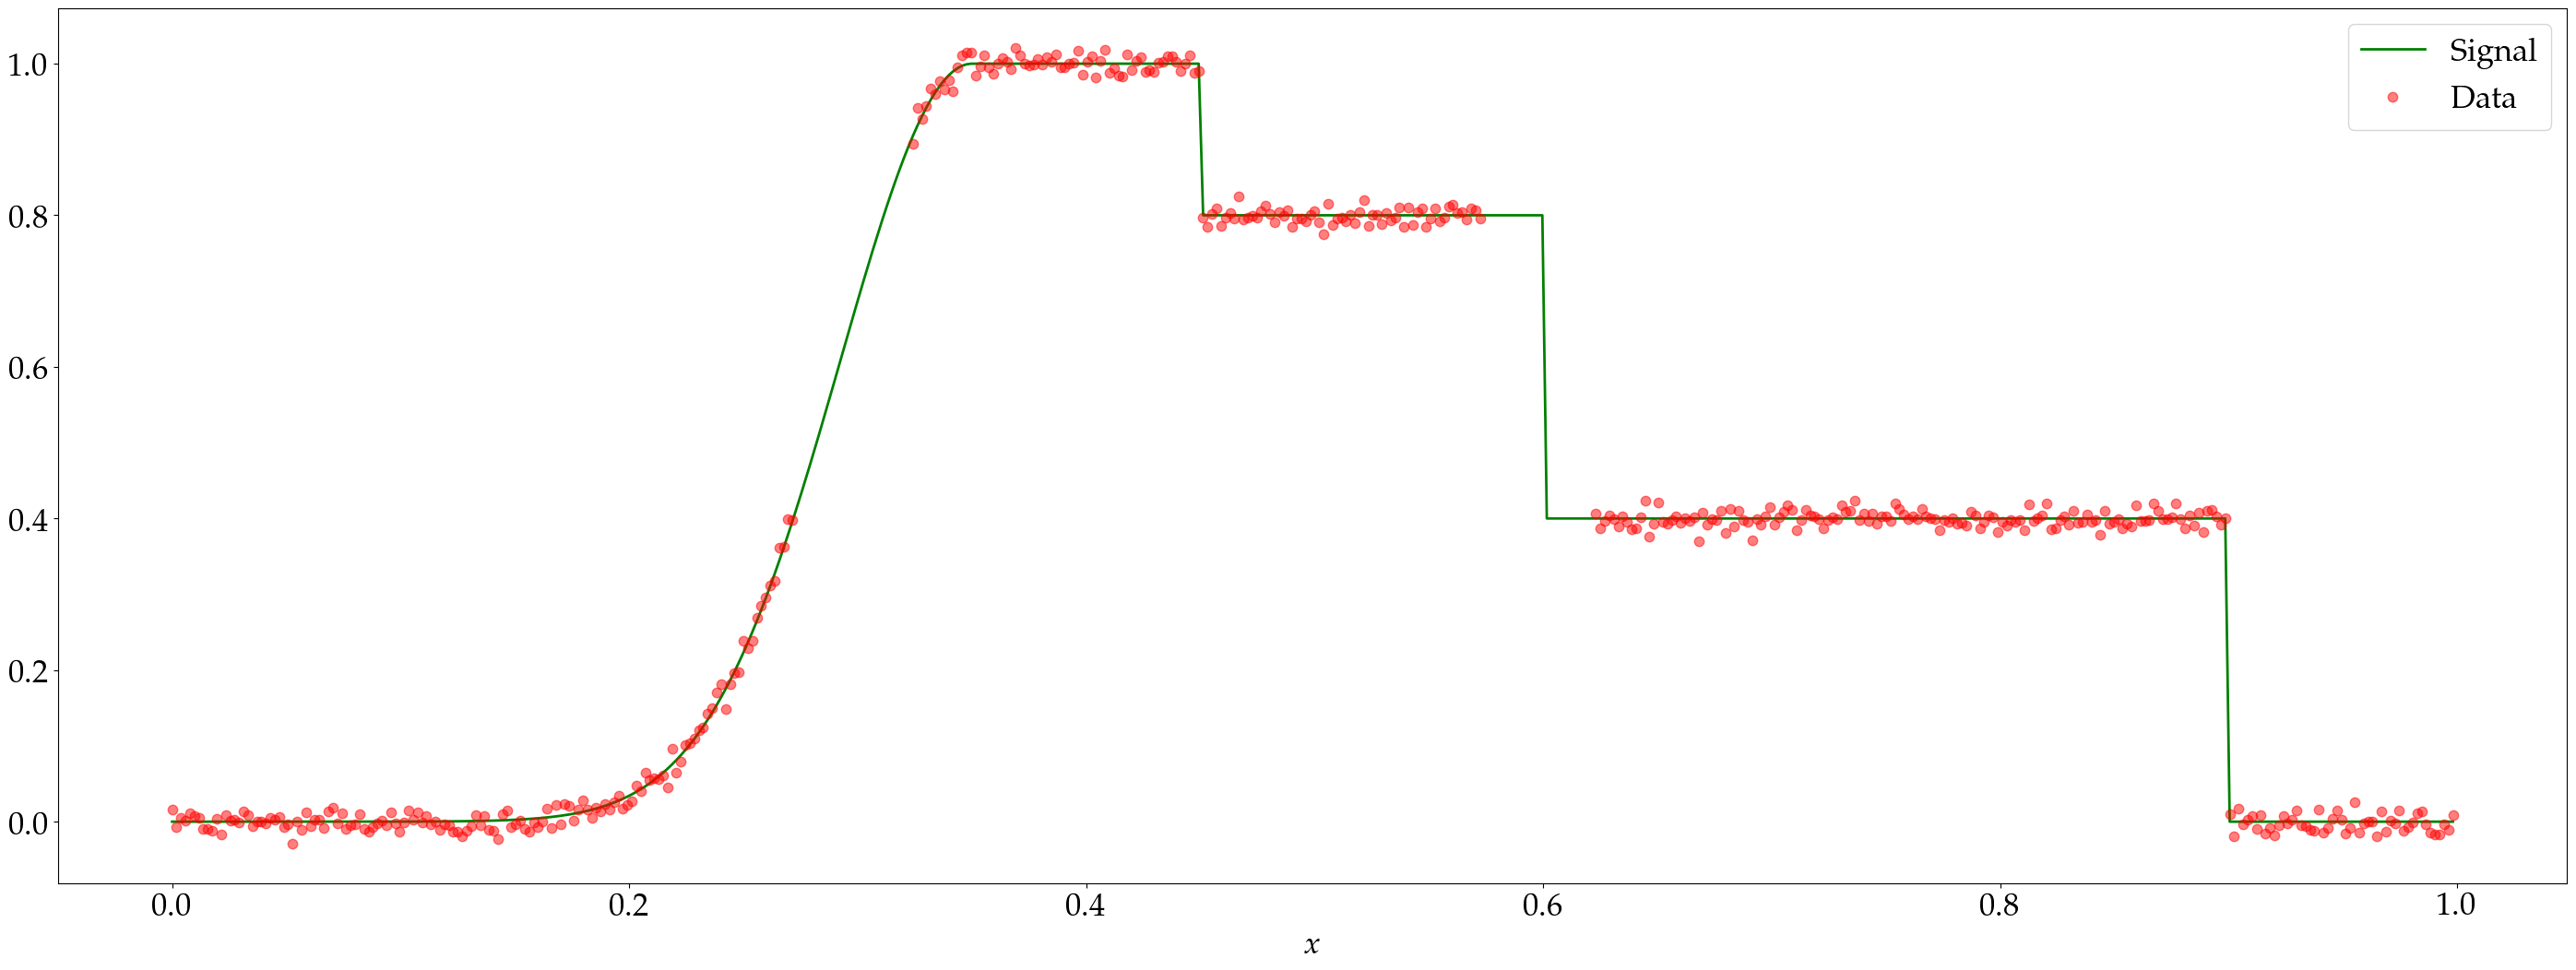

In [ ]:
x = np.linspace(0,1,2**9,endpoint=False)
Signal = np.load("Inpainting_Plot_Data/Inpainting_signal.npy")
Data = np.load("Inpainting_Plot_Data/Inpainting_data.npy")
Region1 = np.load("Inpainting_Plot_Data/Inpainting_region1.npy")
Region2 = np.load("Inpainting_Plot_Data/Inpainting_region2.npy")
Region = np.concatenate((Region1,Region2))
Region_Remain = np.setdiff1d(np.arange(0,2**9,1),Region)
plt.figure(figsize=(71.2*cm_to_in,27*cm_to_in), layout="constrained")
x = np.linspace(0,1,512,endpoint=False)
plt.plot(x,Signal,label=r'Signal',linewidth=2,color='green')
plt.plot(x[Region_Remain],Data,'.',label=r'Data',color='red',markersize=15, alpha=0.5)
plt.legend(fontsize=25)
plt.xlabel(r'$x$',fontsize=25)
plt.tight_layout()
plt.savefig('Figure1.pdf', dpi=300)


## Loading Samples and Computing Estimates

This section involves:
1. Loading samples generated using different wavelets (`db8`) with various parameter combinations (`s` and `p` values).
2. Computing the following for each combination:
   - Mean estimates.
   - 95% high-density intervals (HDIs) to quantify uncertainty.
3. Generating subplots to compare the results across parameter combinations.

### Parameter Combinations
- **`s` Values**: [0.8, 1.4, 2.0].
- **`p` Values**: [1.0, 1.5, 2.0].

The figure provides insights into how different parameter settings affect the reconstruction performance and uncertainty.

The figure is saved as `Figure3.pdf`.

C:\Users\ahor\AppData\Local\Temp\ipykernel_8216\918245523.py:12: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  UQ = az.hdi(Samples[:,index_accept].T,hdi_prob=0.95)
C:\Users\ahor\AppData\Local\Temp\ipykernel_8216\918245523.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


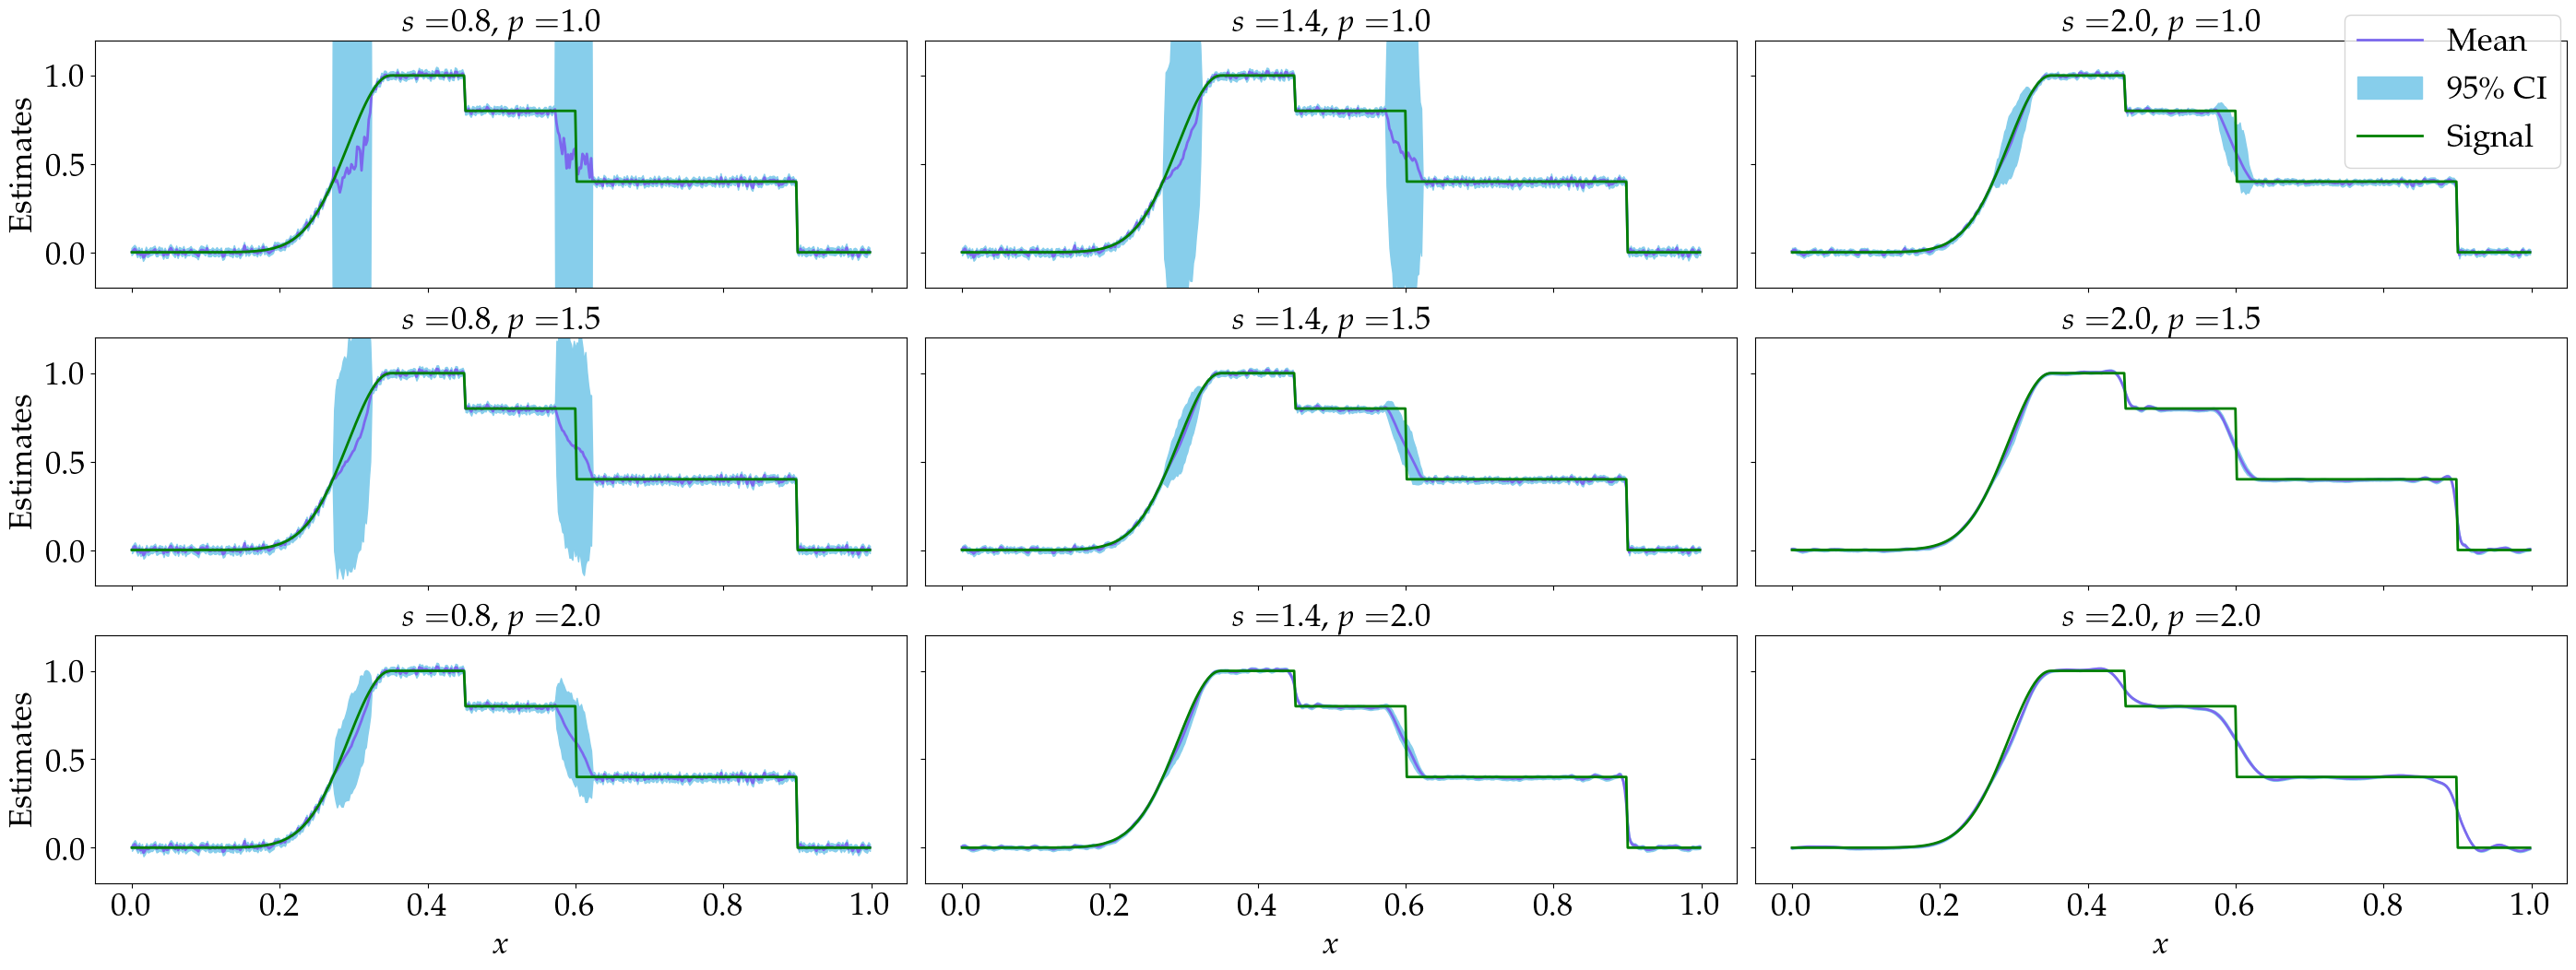

In [ ]:
# Daubechies 8 wavelet case
s = [0.8, 1.4, 2.0]
p = [1.0, 1.5, 2.0]
# Haar wavelet case
wavelet = 'db8'
f,axes = plt.subplots(len(p),len(s), sharex=True,sharey=True, figsize=(71.2*cm_to_in, 27.0*cm_to_in), layout="constrained")
for i in range(len(p)):
    for j in range(len(s)):
        Samples = np.load("Inpainting_Plot_Data/" + wavelet + str(s[j]) + str(p[i]) + "Inpainting_samples.npy")
        index_accept = np.load("Inpainting_Plot_Data/" + wavelet + str(s[j]) + str(p[i]) + "Inpainting_index_accept.npy")
        Mean = np.mean(Samples[:,index_accept],axis=1)
        UQ = az.hdi(Samples[:,index_accept].T,hdi_prob=0.95)
        axes[i,j].plot(x,Mean,linewidth=2,color='mediumslateblue',label=r'Mean')
        axes[i,j].fill_between(x,UQ[:,0],UQ[:,1], color='skyblue', label=r'95\% CI')
        axes[i,j].plot(x,Signal, linewidth=2,label=r'Signal', color='green')
        axes[i,j].set_ylim([-0.2,1.2])
        axes[i,j].set_title(r'$s=${}, '.format(s[j]) + r'$p=${}'.format(p[i]), fontsize=25)
        if j==0:
            axes[i,j].set_ylabel(r'Estimates', fontsize=25)
        if i== 2:    
            axes[i,j].set_xlabel(r'$x$',fontsize=25)
plt.tight_layout()
handles, labels = plt.gca().get_legend_handles_labels()
f.legend(handles, labels, loc='upper right', ncol=1, fontsize=25)
plt.savefig('Figure3.pdf',dpi = 300)

## Comparing Haar (`db1`) and Daubechies (`db8`) Wavelets

This section compares the performance of two wavelets (`db1` and `db8`) for the inpainting problem. For each wavelet:
1. Mean estimates are computed from the accepted samples.
2. 95% HDIs are calculated to quantify uncertainty.
3. Results are visualized side by side for comparison.

### Key Observations
- Differences in reconstruction quality and uncertainty between the wavelets.
- Variations in confidence interval lengths, reflecting the precision of the estimates.

The figure is saved as `Figure2.pdf`.

C:\Users\ahor\AppData\Local\Temp\ipykernel_8216\555644925.py:6: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  UQ_Haar = az.hdi(Samples_Haar[:,index_accept_Haar].T,hdi_prob=0.95)
C:\Users\ahor\AppData\Local\Temp\ipykernel_8216\555644925.py:10: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  UQ_db8 = az.hdi(Samples_db8[:,index_accept_db8].T,hdi_prob=0.95)


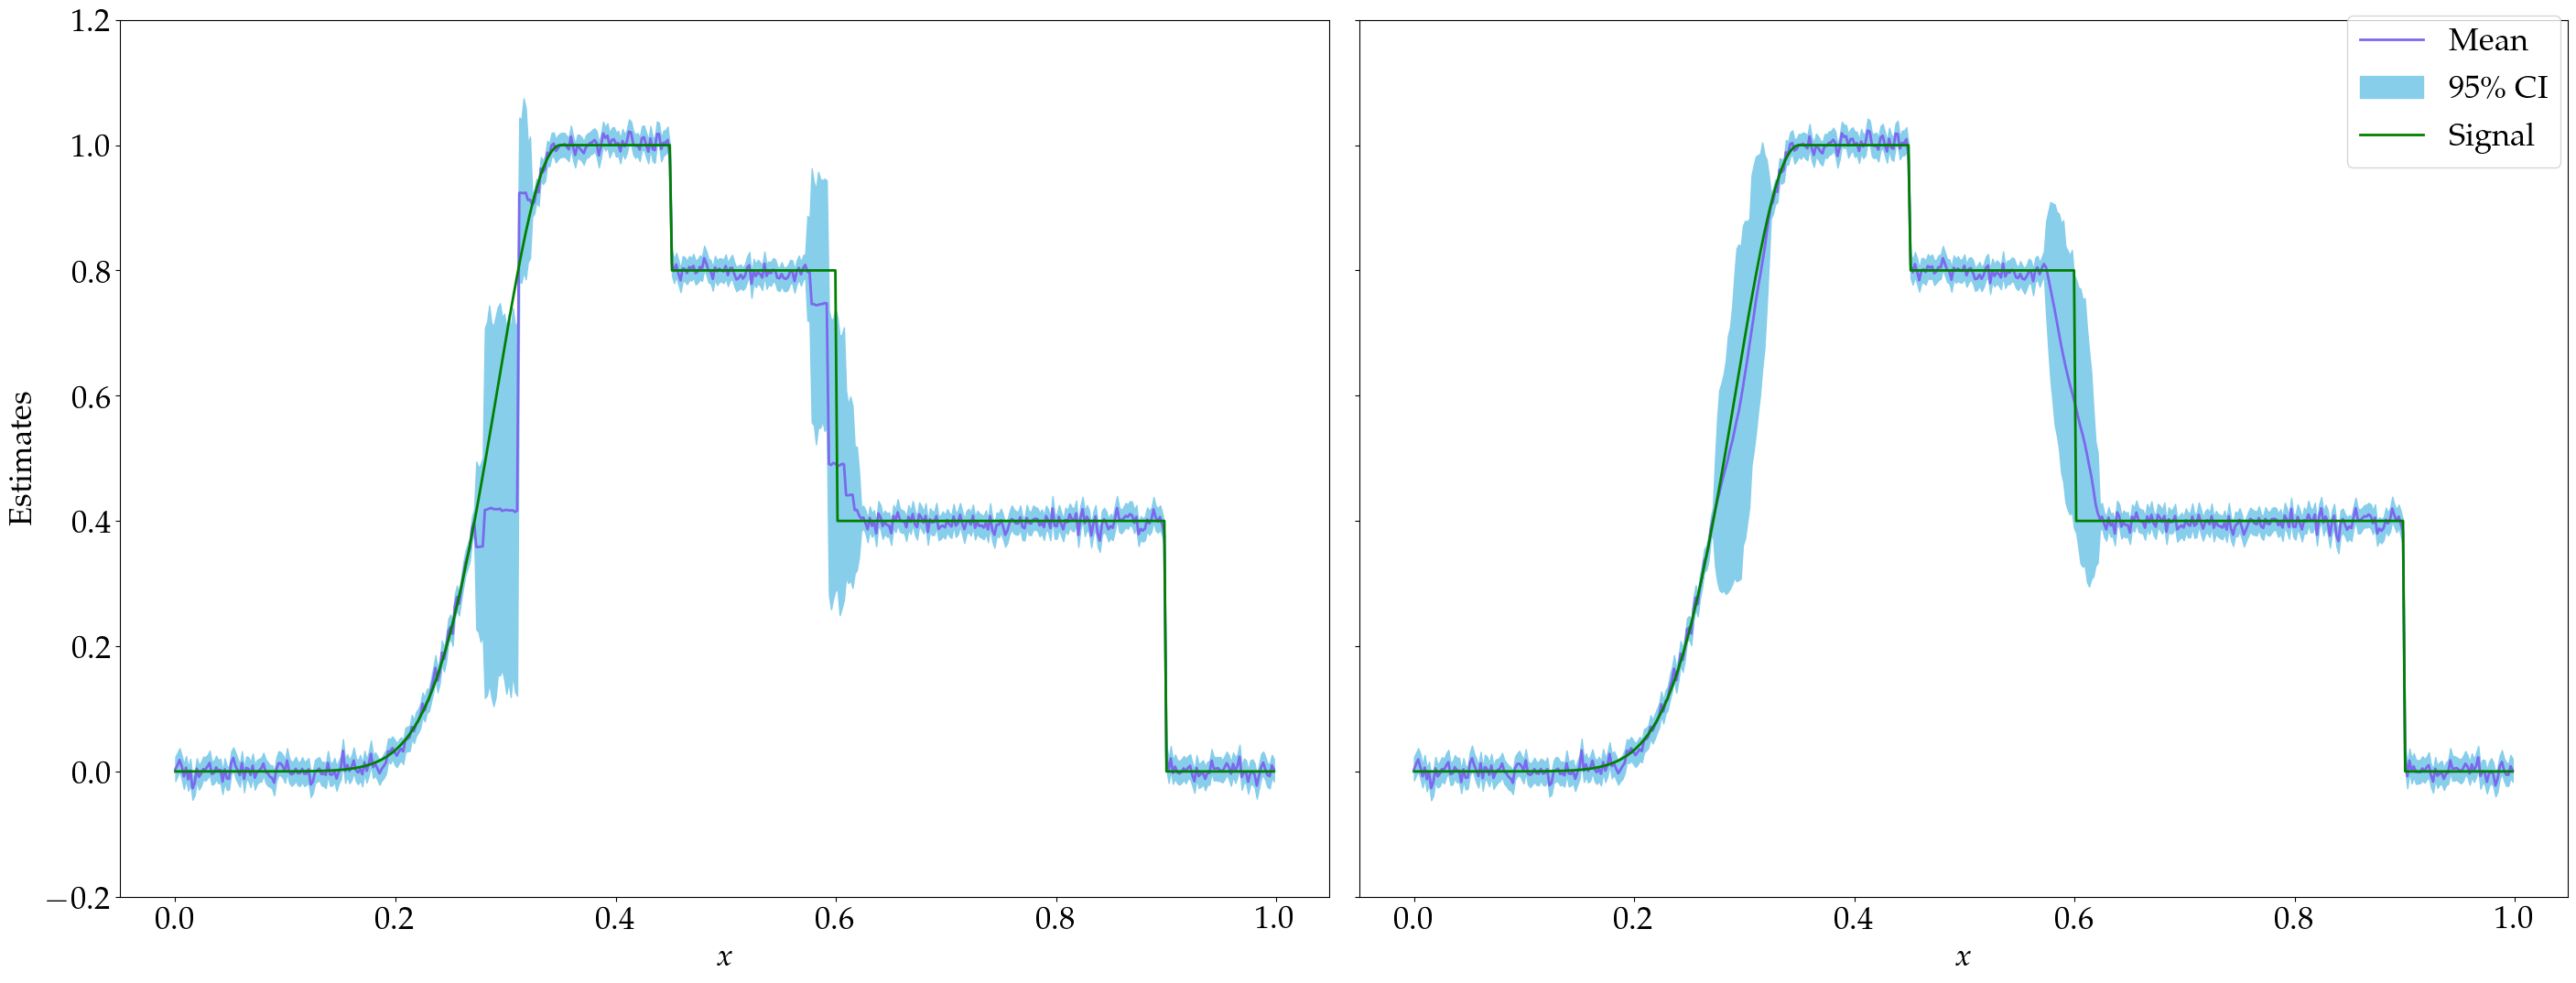

In [ ]:
s = [1.2]
p = [1.5]
Samples_Haar = np.load("Inpainting_Plot_Data/" + 'db1' + str(s[0]) + str(p[0]) + "Inpainting_samples.npy")
index_accept_Haar = np.load("Inpainting_Plot_Data/" + 'db1' + str(s[0]) + str(p[0]) + "Inpainting_index_accept.npy")
Mean_Haar = np.mean(Samples_Haar[:,index_accept_Haar],axis=1)
UQ_Haar = az.hdi(Samples_Haar[:,index_accept_Haar].T,hdi_prob=0.95)
Samples_db8 = np.load("Inpainting_Plot_Data/" + 'db8' + str(s[0]) + str(p[0]) + "Inpainting_samples.npy")
index_accept_db8 = np.load("Inpainting_Plot_Data/" + 'db8' + str(s[0]) + str(p[0]) + "Inpainting_index_accept.npy")
Mean_db8 = np.mean(Samples_db8[:,index_accept_db8],axis=1)
UQ_db8 = az.hdi(Samples_db8[:,index_accept_db8].T,hdi_prob=0.95)
f,axes = plt.subplots(1,2,sharey=True, figsize=(71.2*cm_to_in, 27.0*cm_to_in), layout="constrained")
axes[0].plot(x,Mean_Haar,linewidth=2,color='mediumslateblue',label=r'Mean')
axes[0].fill_between(x,UQ_Haar[:,0],UQ_Haar[:,1], color='skyblue', label=r'95\% CI')
axes[0].plot(x,Signal,linewidth=2,label=r'Signal', color='green')
axes[1].plot(x,Mean_db8,linewidth=2,color='mediumslateblue',label=r'Mean')
axes[1].fill_between(x,UQ_db8[:,0],UQ_db8[:,1], color='skyblue', label=r'95\% CI')
axes[1].plot(x,Signal,linewidth=2,label=r'Signal', color='green')
axes[0].set_xlabel(r'$x$',fontsize=25)
axes[1].set_xlabel(r'$x$',fontsize=25)
axes[0].set_ylabel(r'Estimates',fontsize=25)
axes[0].set_ylim([-0.2,1.2])
axes[1].set_ylim([-0.2,1.2])
handles, labels = plt.gca().get_legend_handles_labels()
f.legend(handles, labels, loc='upper right', ncol=1, fontsize=25)
plt.savefig('Figure2.pdf',dpi = 300)
